In [1]:
# Importing libraries required for the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8) #configuration adjstment for the plots we'll create

#import the data
df = pd.read_csv('Desktop/portfolio_projects/PythonProjects/movies.csv')

In [2]:
#Exploring the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [11]:
#checking for missing data

for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {:.2}%'.format(col,pct_missing))

name - 0.0%
rating - 0.01%
genre - 0.0%
year - 0.0%
released - 0.00026%
score - 0.00039%
votes - 0.00039%
director - 0.0%
writer - 0.00039%
star - 0.00013%
country - 0.00039%
budget - 0.28%
gross - 0.025%
company - 0.0022%
runtime - 0.00052%


In [13]:
# column data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [25]:
# getting rid of unnecessary decimalpoints
df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')
df['votes'] = df['votes'].fillna(0).astype('int64')

In [87]:
# matching the year of release to thr year on the release date column
# here we run into a couple of issueswith the release column since it has a date and location info

# we'll have to 
# 1. Convert the released column to datetime. 
# 2. Extract the year from the released column. 
# 3. Compare the extracted year with the year column.

# Convert the 'released' column to datetime, coercing errors to handle invalid parsing
df['released'] = pd.to_datetime(df['released'], errors='coerce')

# Extract the year from the 'released' column
df['released_year'] = df['released'].dt.year

# Ensure the 'year' column is of integer type
df['year'] = df['year'].astype(int)

# Compare the 'year' column with the 'released_year' column
df['CorrectReleaseYear'] = df['year'] == df['released_year']


In [91]:
#sorting the movies from the highest grossing 
df.sort_values(by = ['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,CorrectReleaseYear
0,6587,6,6,1980,1970-01-01 00:00:00.000001705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,1970,False
1,5573,6,1,1980,1970-01-01 00:00:00.000001492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,1970,False
2,5142,4,0,1980,1970-01-01 00:00:00.000001771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,1970,False
3,286,4,4,1980,1970-01-01 00:00:00.000001492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,1970,False
4,1027,6,4,1980,1970-01-01 00:00:00.000001543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,1970,False


In [93]:
# dropping any duplicates in the data
df['company'].drop_duplicates().sort_values(ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year,CorrectReleaseYear
0,6587,6,6,1980,1970-01-01 00:00:00.000001705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,1970,False
1,5573,6,1,1980,1970-01-01 00:00:00.000001492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,1970,False
2,5142,4,0,1980,1970-01-01 00:00:00.000001771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,1970,False
3,286,4,4,1980,1970-01-01 00:00:00.000001492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,1970,False
4,1027,6,4,1980,1970-01-01 00:00:00.000001543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,1970,False


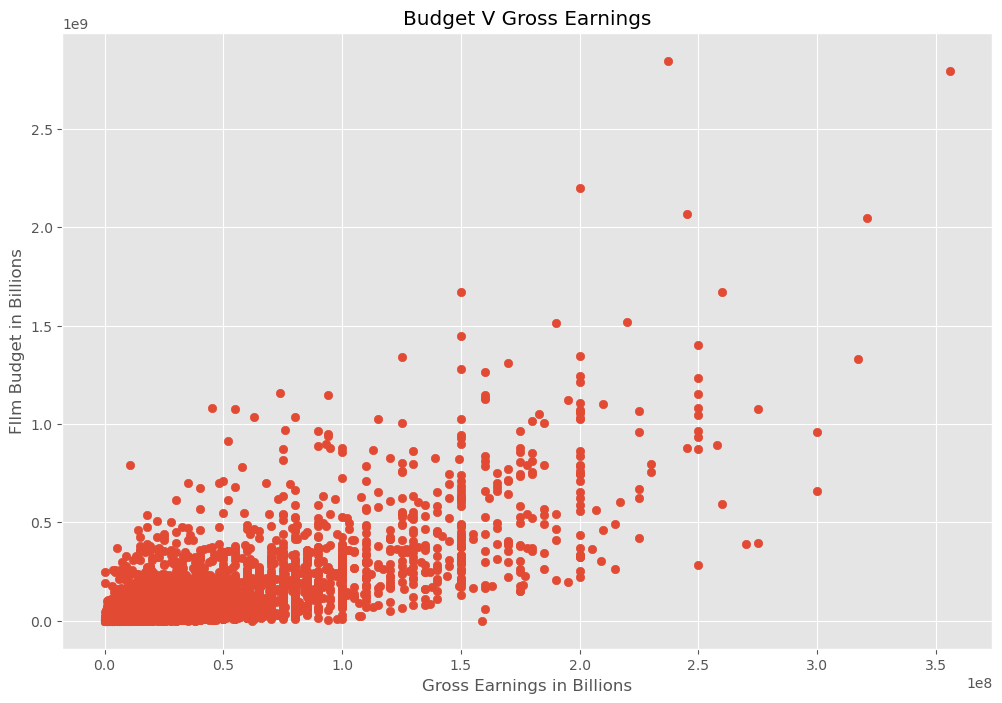

In [41]:
# checking for correlation
# Hypothesis: High budget movies tend tobring in high earnings

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget V Gross Earnings')
plt.xlabel('Gross Earnings in Billions')
plt.ylabel('FIlm Budget in Billions')
plt.show()


<Axes: xlabel='budget', ylabel='gross'>

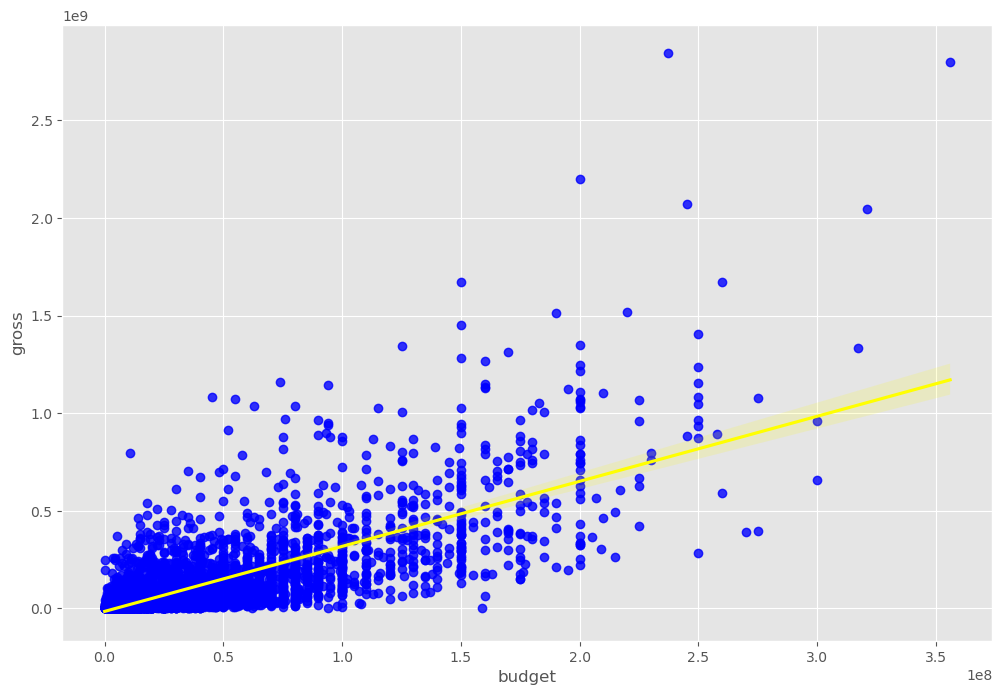

In [49]:
# developing a regression plot
# plotting budget v grass using seaborn
# types of methods: Pearson, Kendall, Spearman

sns.regplot(x = 'budget', y='gross', data=df, scatter_kws={"color":"blue"}, line_kws={"color":"yellow"})

In [19]:
# df.corr(method='pearson') -- this did not work because some of the columns have none numerical data
# Select only the numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix using either Pearson, Kendall or Spearman Formulae
correlation_matrix = numeric_df.corr(method='pearson')
print(correlation_matrix)

# we can then ascertain our hypothesis that budget is directly proportional to gross earnings

             year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.329321  0.257486  0.120811
score    0.097995  1.000000  0.409182  0.076254  0.186258  0.399451
votes    0.222945  0.409182  1.000000  0.442429  0.630757  0.309212
budget   0.329321  0.076254  0.442429  1.000000  0.740395  0.320447
gross    0.257486  0.186258  0.630757  0.740395  1.000000  0.245216
runtime  0.120811  0.399451  0.309212  0.320447  0.245216  1.000000


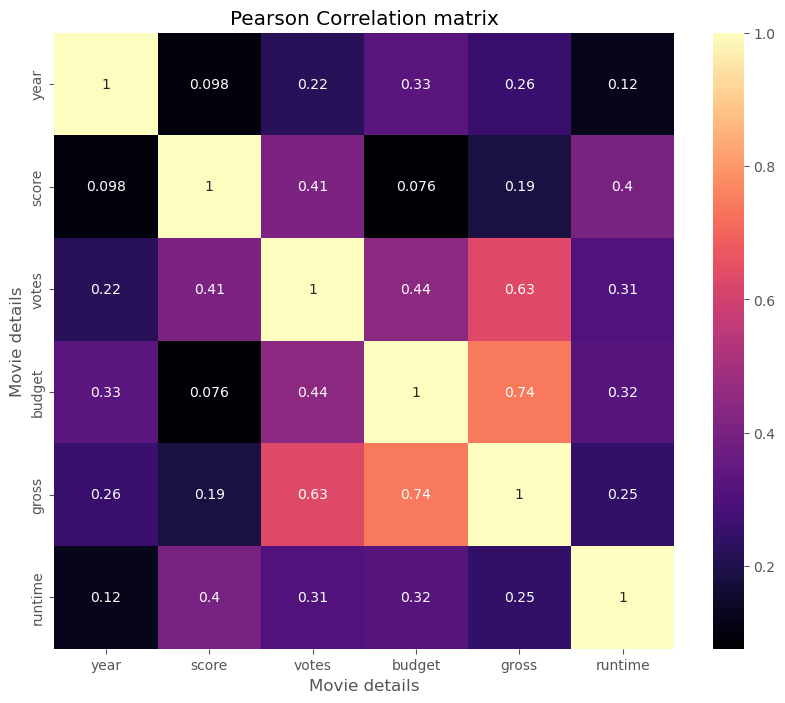

In [71]:
plt.figure(figsize=(10,8))
correlation_matrix = numeric_df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True, cmap='magma')
plt.title('Pearson Correlation matrix')
plt.xlabel('Movie details')
plt.ylabel('Movie details')
plt.show()

In [47]:
# let us look at company data
df_numerized = df
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000.0,NaN,-1,90.0
7664,1678,-1,4,2020,1107,4.7,36.0,774,2614,1886,55,NaN,NaN,539,90.0
7665,4717,-1,6,2020,193,5.7,29.0,2061,2683,2040,55,58750.0,NaN,941,NaN
7666,2843,-1,6,2020,2817,NaN,NaN,1184,1824,450,55,15000.0,NaN,-1,120.0


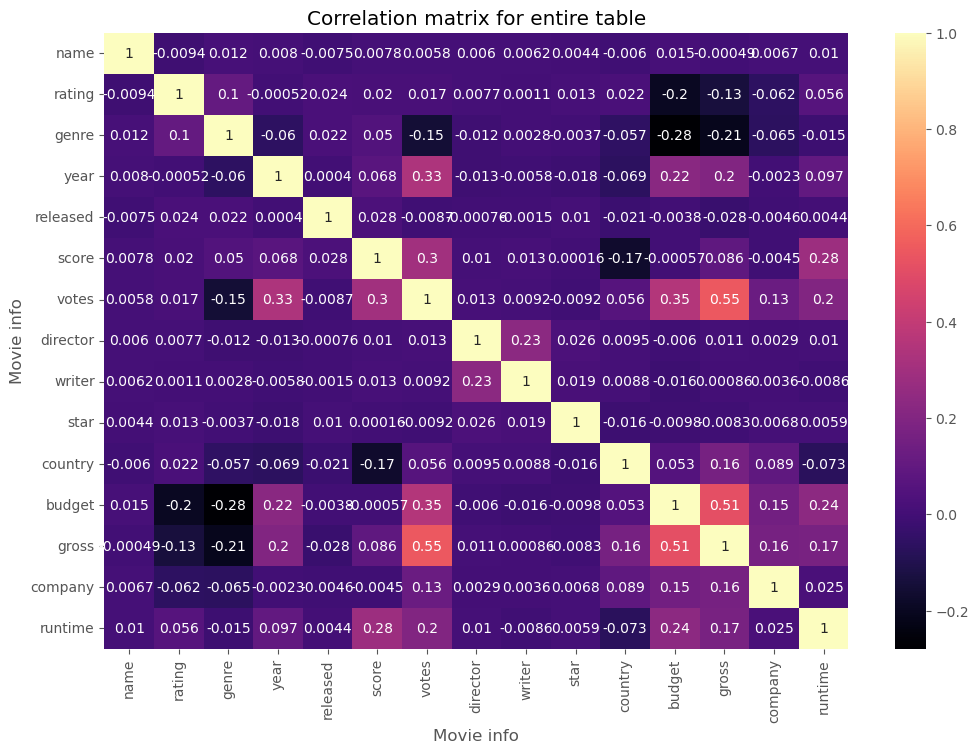

In [49]:
#plotting the correlation matrices for the entire df
correlation_matrix = df_numerized.corr(method= 'kendall')
sns.heatmap(correlation_matrix, annot=True, cmap='magma')
plt.title('Correlation matrix for entire table')
plt.xlabel('Movie info')
plt.ylabel('Movie info')
plt.show()

In [51]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174


In [57]:
# unstacking and simplifying the correlation sets
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
                       ...   
runtime  country    -0.078412
         budget      0.320447
         gross       0.245216
         company     0.034402
         runtime     1.000000
Length: 225, dtype: float64

In [63]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs


budget   genre     -0.356564
genre    budget    -0.356564
         gross     -0.235650
gross    genre     -0.235650
rating   budget    -0.176002
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [67]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# Votes, Budget and gross earning have the highest correlation
# we can then safely conclude that the higher the budget the higher the chances of the movie doing well